In [4]:
import numpy as np
import pandas as pd
import os
pd.set_option('max_columns', 150)

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [6]:
os.getcwd()

'C:\\Users\\utkar\\Documents\\Case Competitions\\Tredence Hackathon'

In [7]:
os.chdir("C:/Users/utkar/Documents/Case Competitions/Tredence Hackathon/Retail Recommender Data/dataset/Raw Data")

In [46]:
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv') 
order_products_train = pd.read_csv('train.csv')
order_procucts_test = pd.read_csv('test.csv')

# EDA

### Analyzing orders dataframe

In [47]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [48]:
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [49]:
# No null values
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

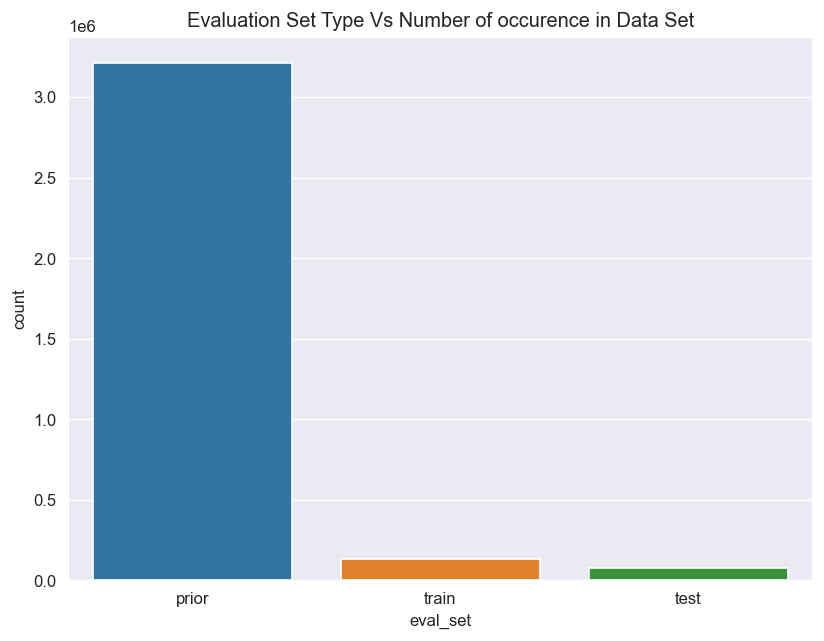

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
ax= sns.countplot(x='eval_set', data= orders)
ax.set_title('Evaluation Set Type Vs Number of occurence in Data Set', fontsize=12)

plt.show()

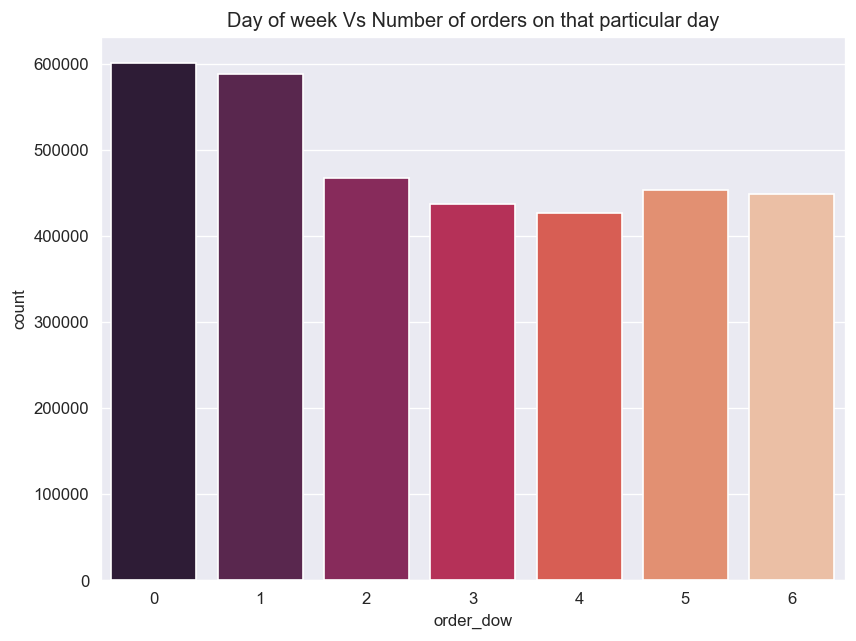

In [51]:
plt.figure(figsize=(8,6))
ax= sns.countplot(x='order_dow', data= orders, palette='rocket')
ax.set_title('Day of week Vs Number of orders on that particular day', fontsize=12)

plt.show()

####  We can see that maximum number of orders is on Sunday, followed by monday. which makes sense as people will want to buy groceries either at the weekend or start of the week. Mid-week has less number of orders with minimum orders on thursday.

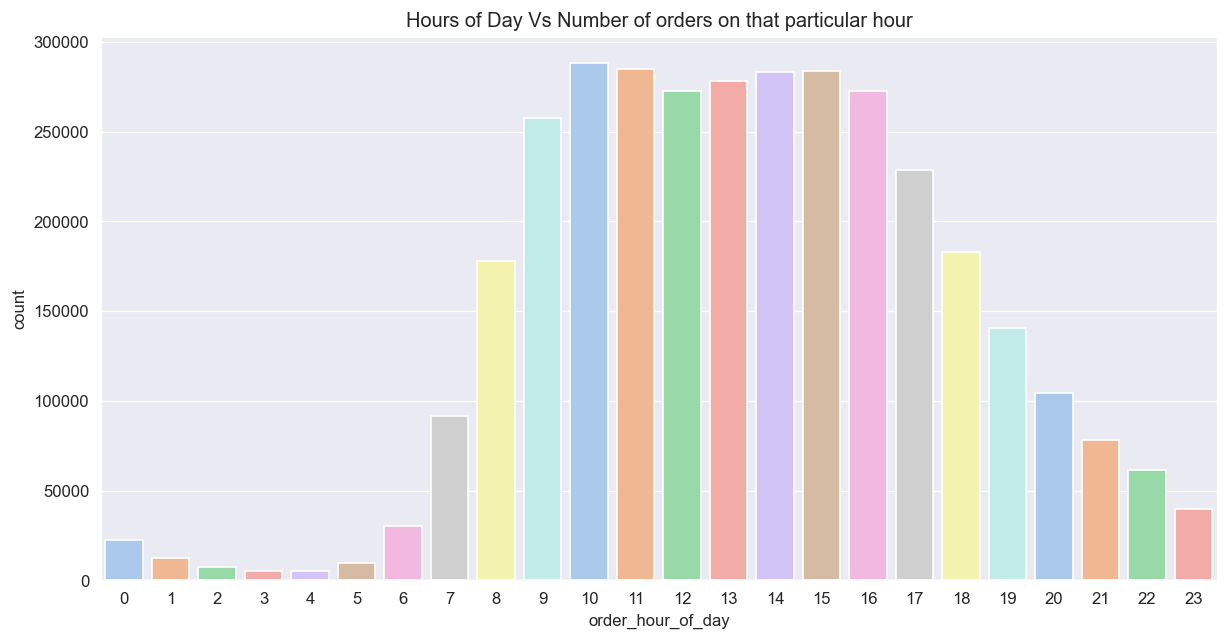

In [52]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='order_hour_of_day', data= orders, palette='pastel')
ax.set_title('Hours of Day Vs Number of orders on that particular hour', fontsize=12)

plt.show()

#### Maximum number of orders are from 10 am - 5pm. At night between 1-5am orders are the least as that is when people are sleeping.

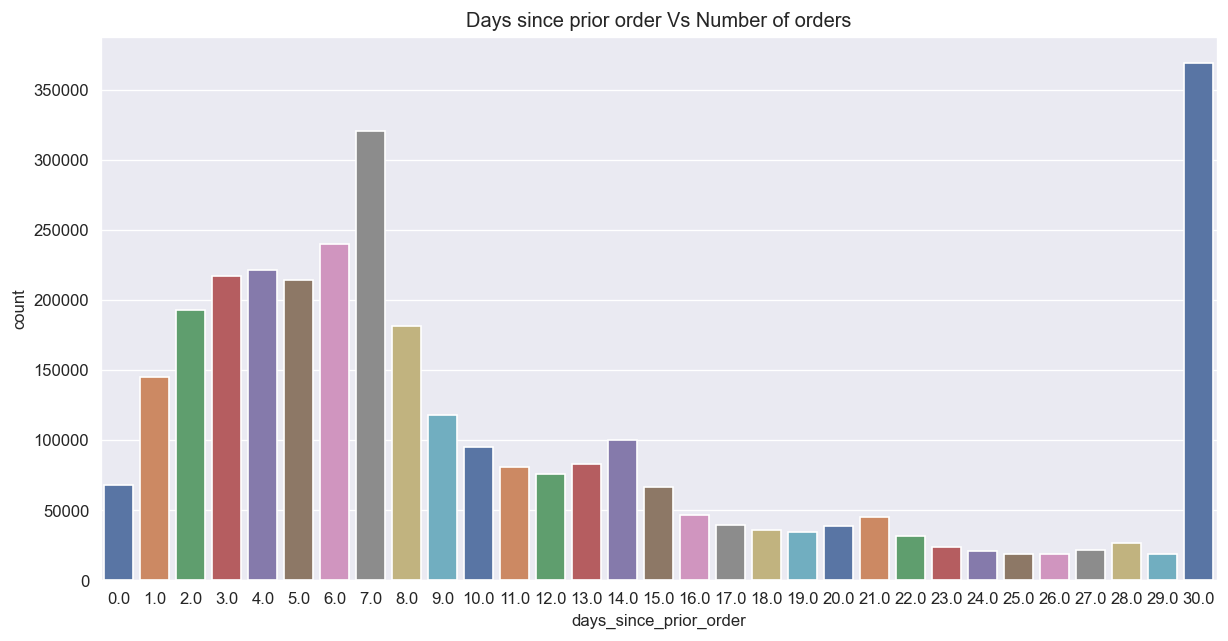

In [53]:
plt.figure(figsize=(12,6))
ax= sns.countplot(x='days_since_prior_order', data= orders, palette='deep')
ax.set_title('Days since prior order Vs Number of orders', fontsize=12)

plt.show()

#### From the graph it is clear that there is a peak on 7th day, then local peaks at day 14,day 21 and day 28. Then there is a global peak on day 30 meaning monthly peak.

In [54]:
#Group orders according to day of week and hour of day for better visualization
orders_grouped = orders.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
orders_grouped

,order_dow,order_hour_of_day,order_number
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
...,...,...,...
163,6,19,18346
164,6,20,13392
165,6,21,10501
166,6,22,8532


In [55]:
#pivoting the data set 
#This table shows no. of orders on all days of week on a particular hour of day .
orders_grouped= orders_grouped.pivot('order_dow','order_hour_of_day', 'order_number')
orders_grouped

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,48465,51035,51443,53849,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,55671,51584,47079,46728,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,39230,38128,35780,36650,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,36040,35215,33455,34161,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,35034,33857,32249,32751,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,38313,37915,35714,36296,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,35665,36994,37121,37564,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


<AxesSubplot:xlabel='order_hour_of_day', ylabel='order_dow'>

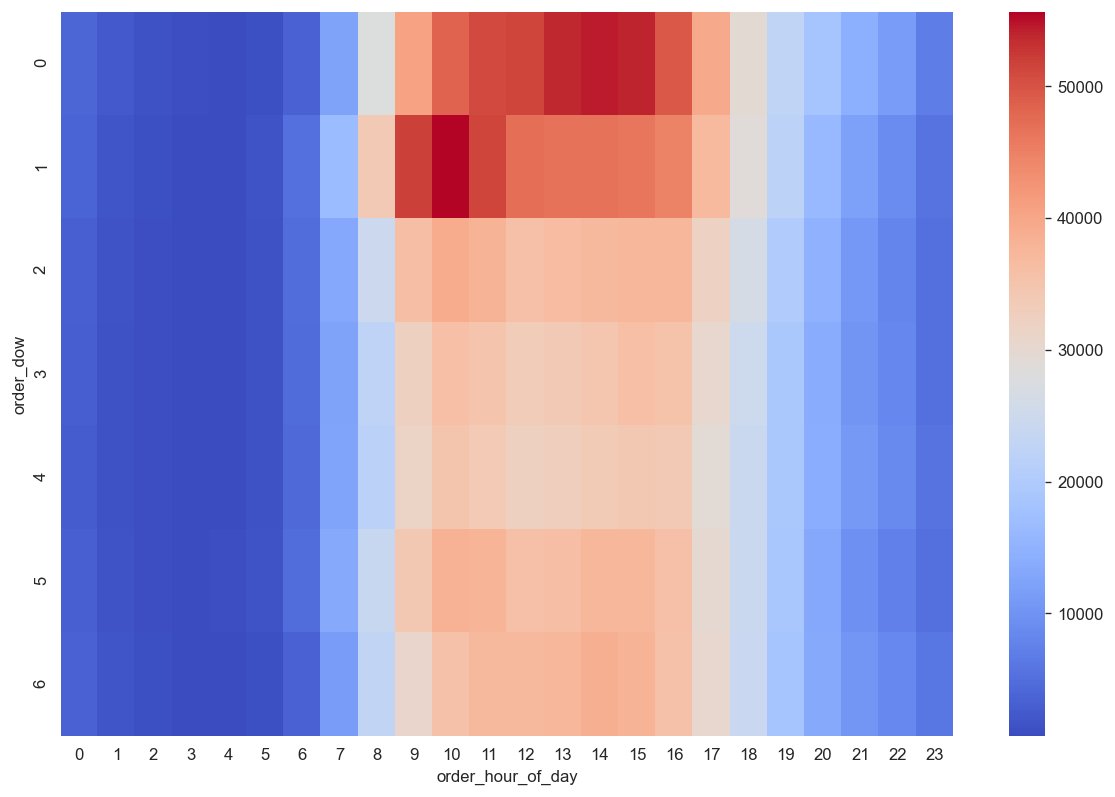

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(orders_grouped, cmap='coolwarm')

####  Maximum order numbers are either on sunday 2 PM or on monday 10 AM

In [56]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [57]:
order_products_prior['reordered'].sum()

19126536

In [58]:
len(order_products_prior)

32434489

In [59]:
order_products_prior['reordered'].sum()/len(order_products_prior)

0.5896974667922161

In [60]:
order_products_train['reordered'].sum()/len(order_products_train)

0.6065507398678277

#### Almost 60% products are reordered in both order_products_prior and order_products_train dataframe.

In [71]:
order_products_train1=order_products_train.drop(['user_id','ID'],axis=1)
order_products_train1

,order_id,product_id,add_to_cart_order,reordered
0,1187899,27845,9,0
1,1187899,38928,3,1
2,1187899,39657,5,1
3,1187899,26405,4,1
4,1187899,196,1,1
...,...,...,...,...
787906,2807393,18599,5,0
787907,2807393,30434,18,0
787908,2807393,18526,10,0
787909,187677,5876,3,1


In [73]:
#Combining order_products_train and order_products_prior as order_products.
order_products=order_products_prior.append(order_products_train1)
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
787906,2807393,18599,5,0
787907,2807393,30434,18,0
787908,2807393,18526,10,0
787909,187677,5876,3,1


In [74]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(33222400, 15)

In [75]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33222400 entries, 0 to 33222399
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 4.0+ GB


In [76]:
#Reducing memory usage for faster analysis

def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [77]:
order_products = reduce_memory(order_products)

Memory usage of properties dataframe is : 4055.46875  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1996.051025390625  MB
This is  49.21875 % of the initial size


In [79]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [80]:
#Aisles
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,aisle,total,reorders
0,fresh fruits,3728941,2679862.0
1,fresh vegetables,3503415,2084453.0
2,packaged vegetables fruits,1810080,1156888.0
3,yogurt,1484050,1019002.0
4,packaged cheese,1003292,587555.0


### Total Orders and Reorders From Most Popular Aisles

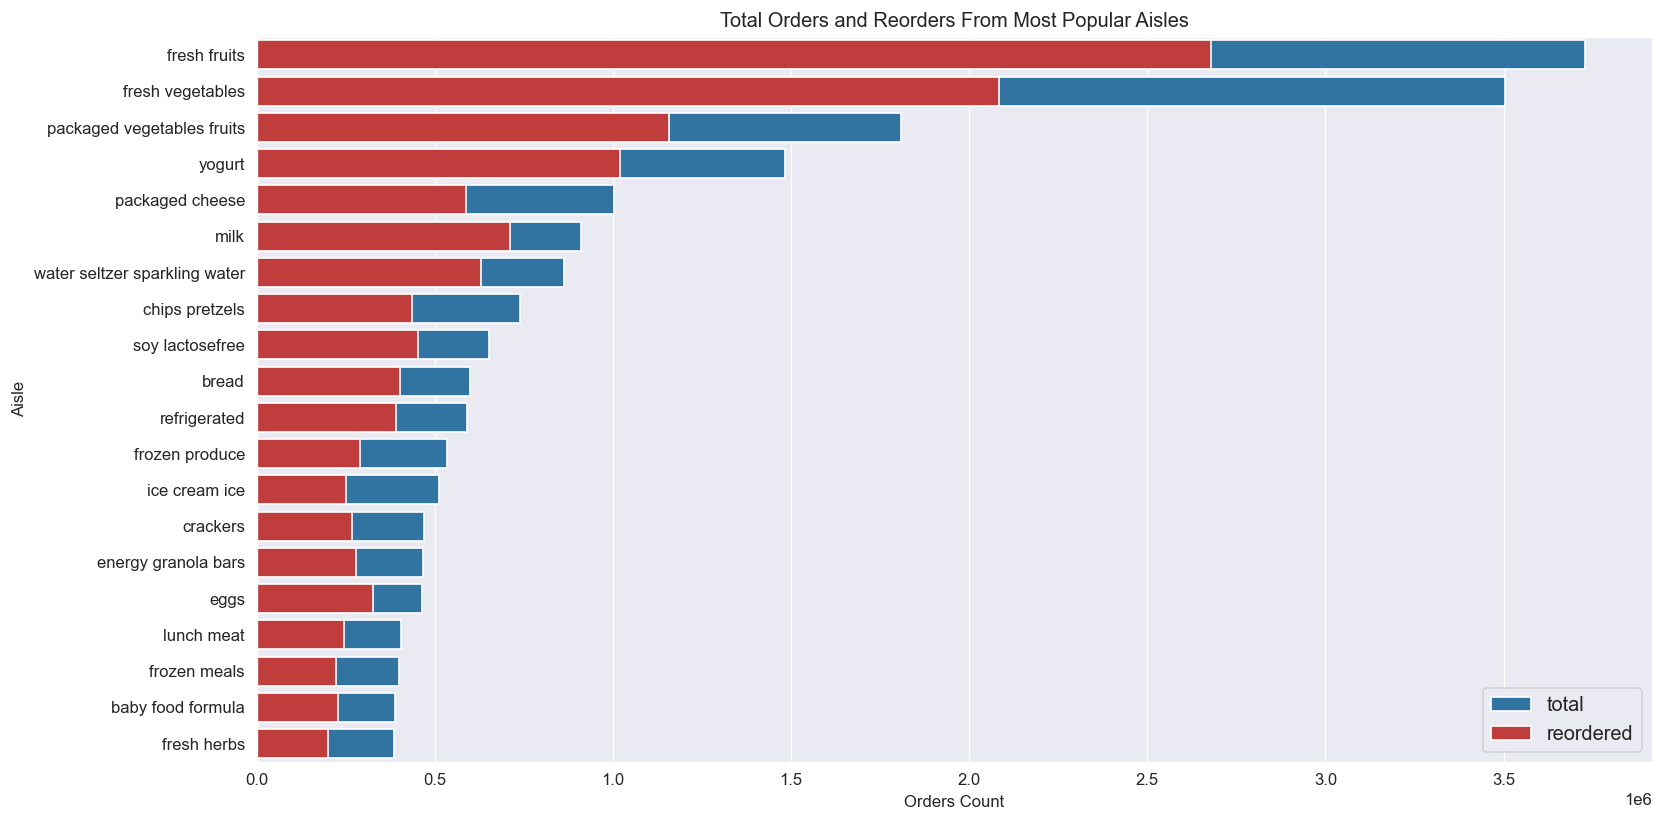

In [81]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [82]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()
temp_df.head()

,index,aisle,total,reorders,reorder_ratio
0,5,milk,910023,711435.0,0.781777
1,6,water seltzer sparkling water,862743,629802.0,0.730000
2,0,fresh fruits,3728941,2679862.0,0.718666
3,15,eggs,463645,327374.0,0.706088
4,8,soy lactosefree,653485,452621.0,0.692626


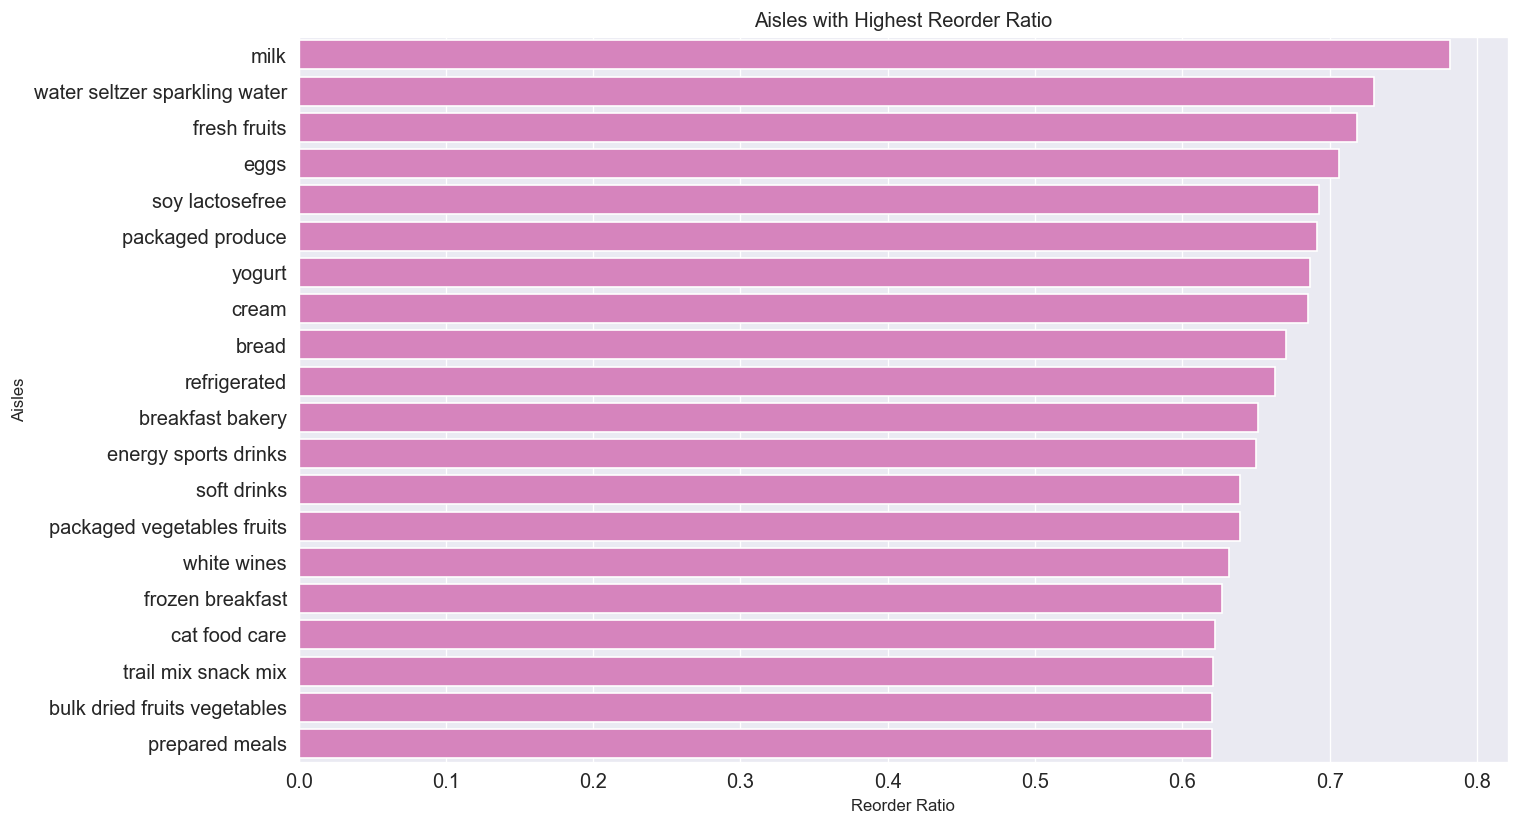

In [87]:
#Top Aisles with Highest Reorder Ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[6])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

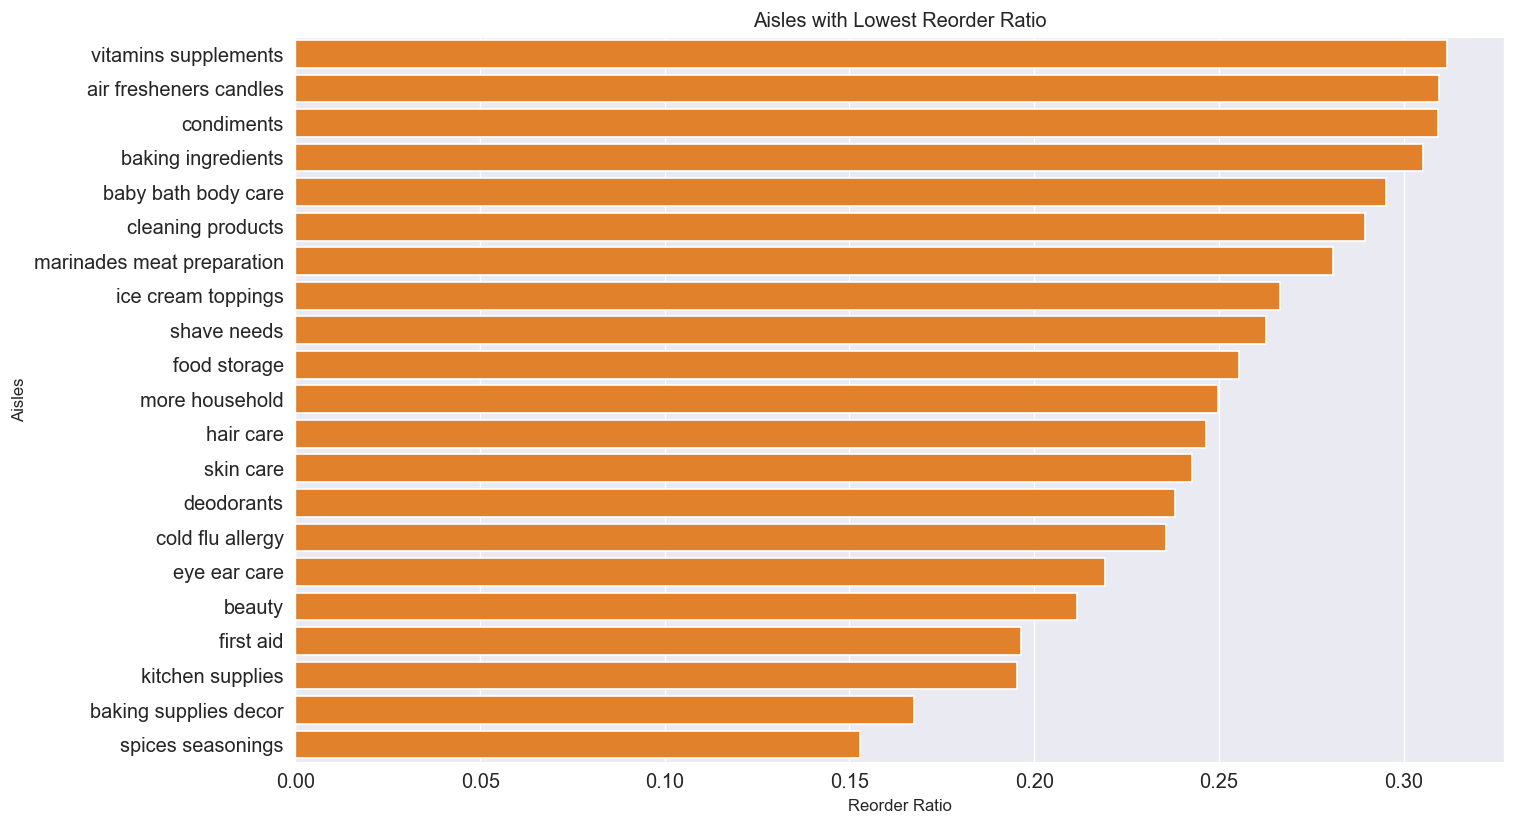

In [88]:
#Aisles with Lowest Reorder Ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[1])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [89]:
#Departments
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,department,total,reorders
0,produce,9712998,6317578.0
1,dairy eggs,5538593,3712173.0
2,snacks,2954899,1697767.0
3,beverages,2755734,1801651.0
4,frozen,2293169,1244210.0


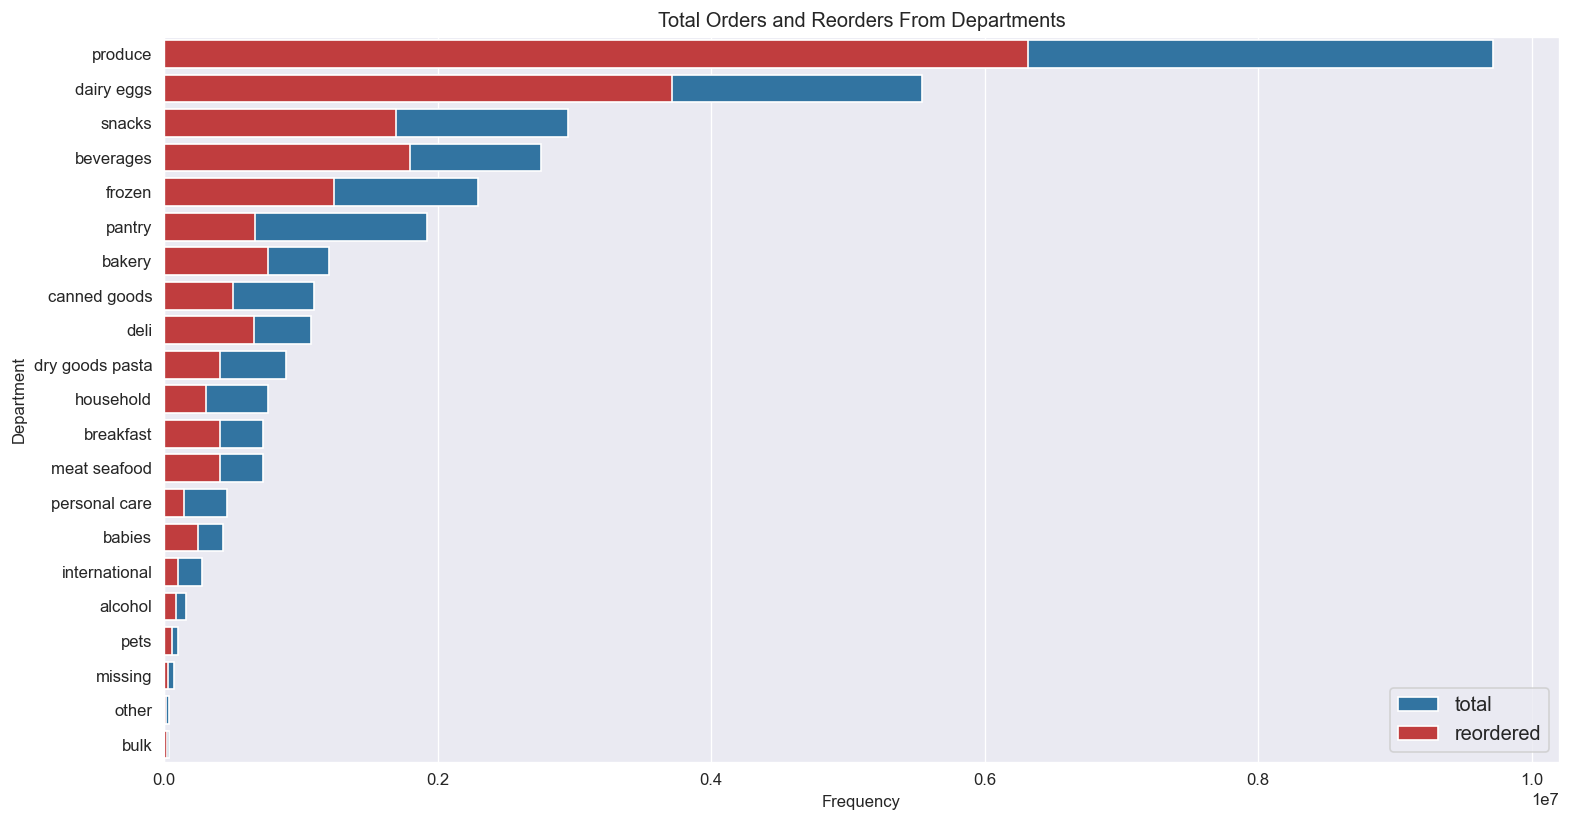

In [91]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[3], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [92]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()
temp_df.head()

,index,department,total,reorders,reorder_ratio
0,1,dairy eggs,5538593,3712173.0,0.670238
1,3,beverages,2755734,1801651.0,0.653783
2,0,produce,9712998,6317578.0,0.650425
3,6,bakery,1204281,756791.0,0.628417
4,8,deli,1076438,654616.0,0.608132


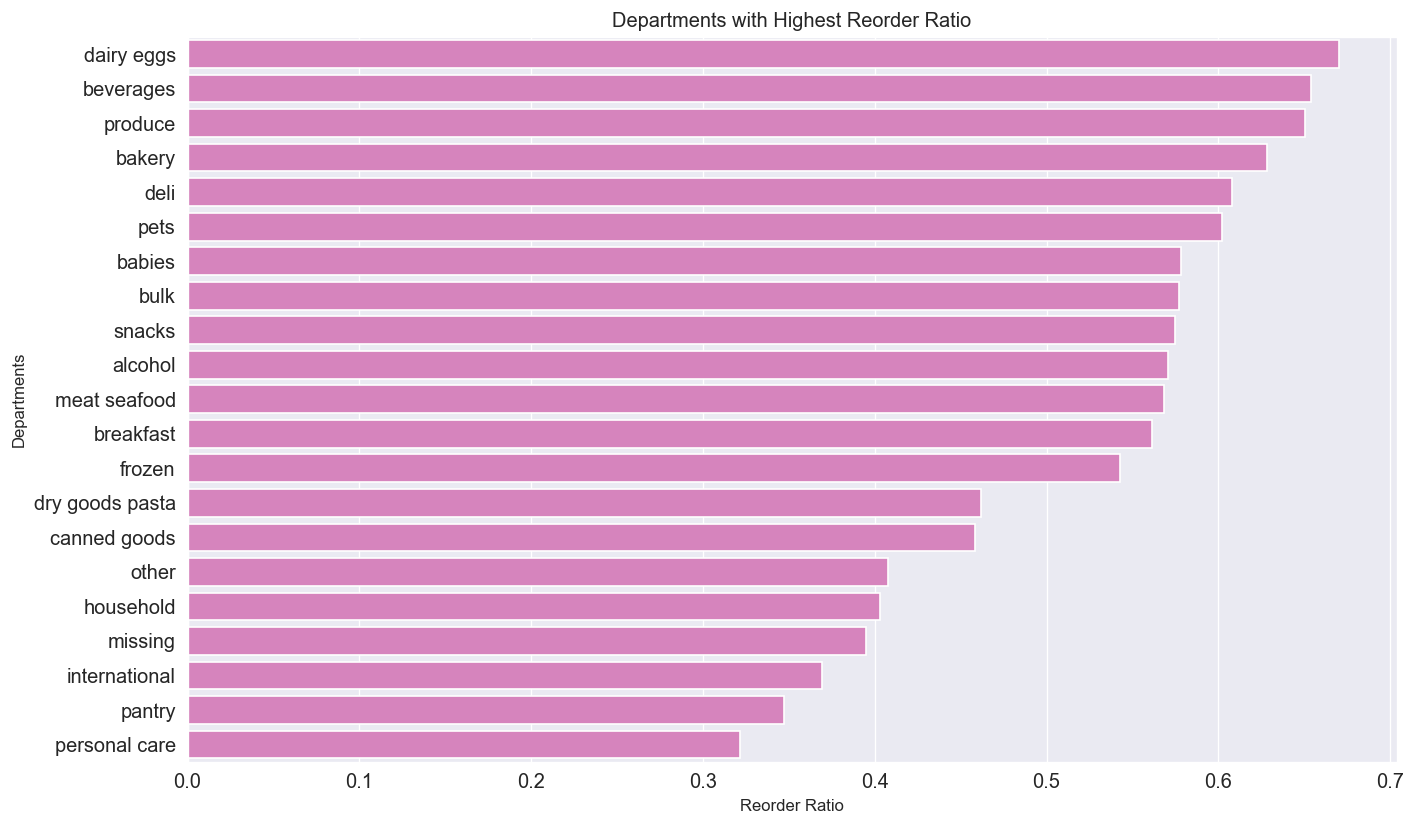

In [94]:
#Departments with Highest Reorder Ratio
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color=color[6])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [96]:
#Products
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df.head()

,product_name,total,reorders
0,Banana,483504,408325.0
1,Bag of Organic Bananas,388566,323784.0
2,Organic Strawberries,271042,210906.0
3,Organic Baby Spinach,247598,191568.0
4,Organic Hass Avocado,217838,173685.0


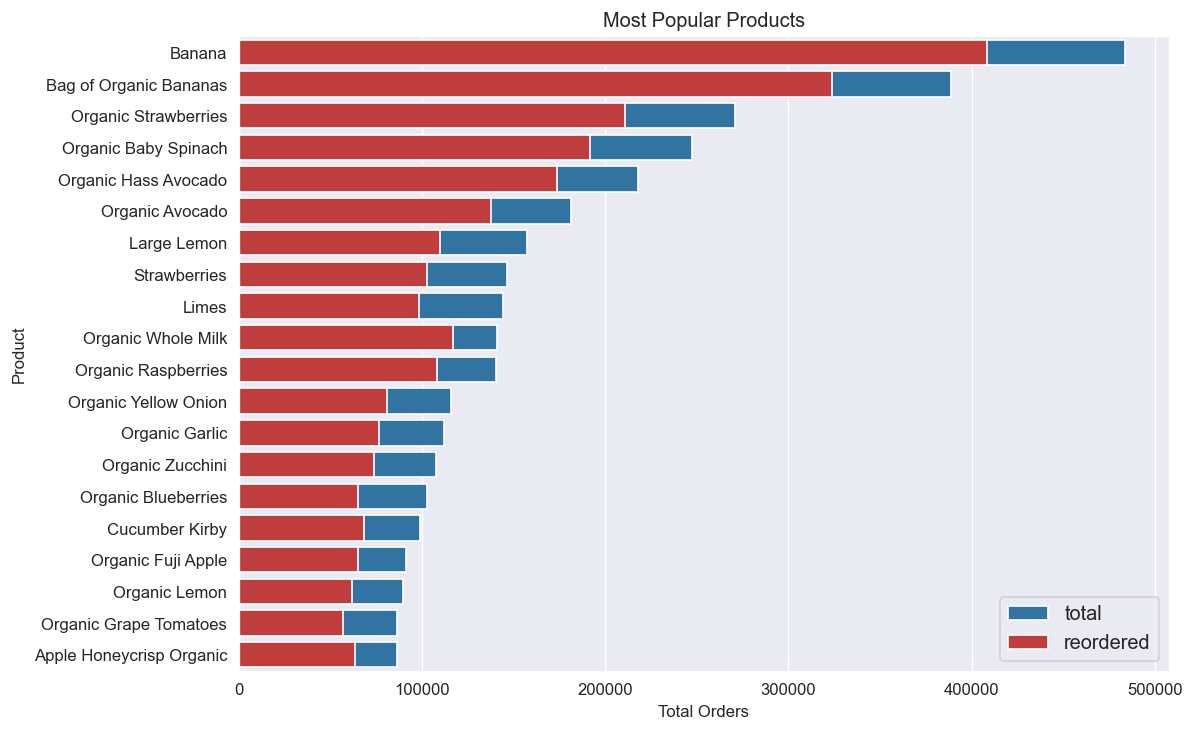

In [97]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[0], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[3], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [98]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23663,Raw Veggie Wrappers,69,65.0,0.942029
21284,Serenity Ultimate Extrema Overnight Pads,89,83.0,0.932584
39968,Orange Energy Shots,13,12.0,0.923077
20195,Chocolate Love Bar,101,93.0,0.920792
30449,Soy Powder Infant Formula,35,32.0,0.914286
27810,Simply Sleep Nighttime Sleep Aid,45,41.0,0.911111
35085,"Energy Shot, Grape Flavor",22,20.0,0.909091
24860,Sparking Water,61,55.0,0.901639
31817,Russian River Valley Reserve Pinot Noir,30,27.0,0.900000
23719,Bars Peanut Butter,69,62.0,0.898551


In [99]:
#Product Users
product_unique_users = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,75179
3472,Bag of Organic Bananas,64782
31923,Organic Strawberries,60136
28843,Organic Baby Spinach,56030
22415,Large Lemon,47656
23422,Limes,45889
30300,Organic Hass Avocado,44153
42908,Strawberries,44110
28807,Organic Avocado,43469
29011,Organic Blueberries,38048


In [100]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65.0,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,89,83.0,0.932584
28415,Orange Energy Shots,1,13,12.0,0.923077
8537,Chocolate Love Bar,8,101,93.0,0.920792
41723,Soy Powder Infant Formula,3,35,32.0,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41.0,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20.0,0.909091
41802,Sparking Water,6,61,55.0,0.901639
38793,Russian River Valley Reserve Pinot Noir,3,30,27.0,0.900000
3832,Bars Peanut Butter,7,69,62.0,0.898551


In [101]:
#Cumulative Sum of Unique Users Per Product
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,75179,483504,408325.0,0.844512,75179
1,Bag of Organic Bananas,64782,388566,323784.0,0.833279,139961
2,Organic Strawberries,60136,271042,210906.0,0.778130,200097
3,Organic Baby Spinach,56030,247598,191568.0,0.773706,256127
4,Large Lemon,47656,157371,109715.0,0.697174,303783


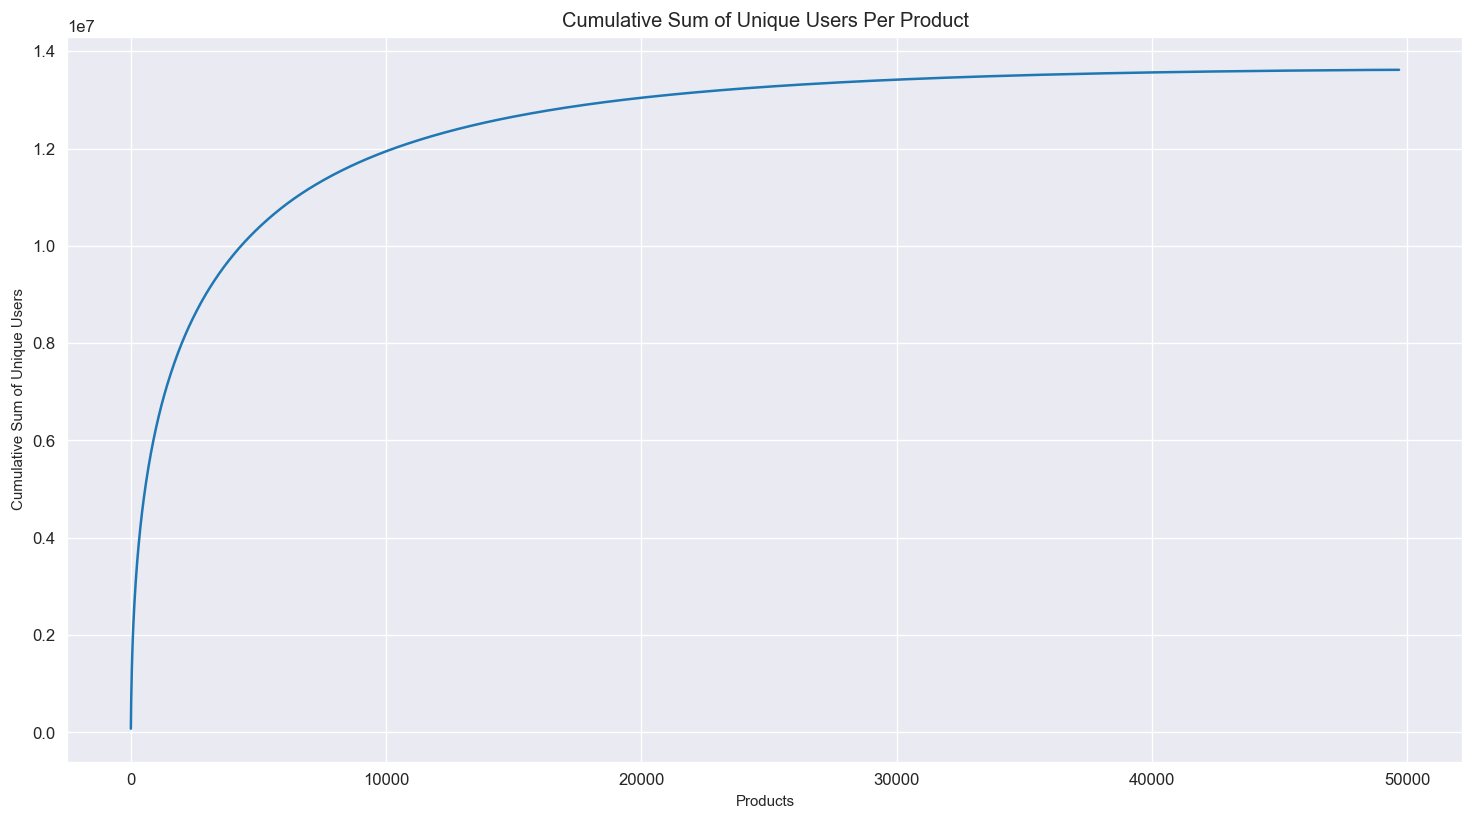

In [102]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique Users", size = 9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size = 12)
plt.show()

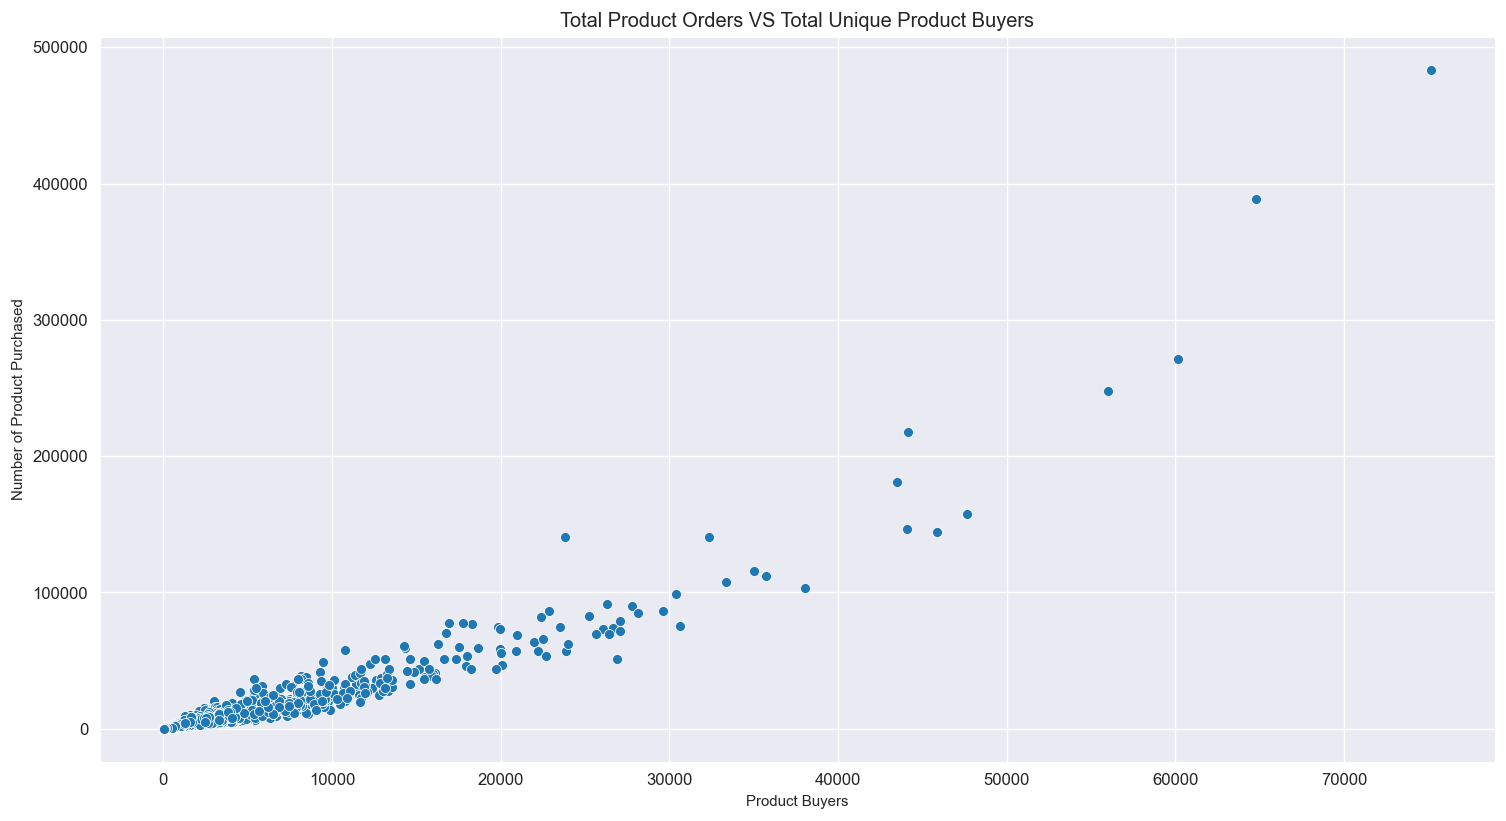

In [103]:
#Total Product Orders VS Total Unique Product Buyers
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

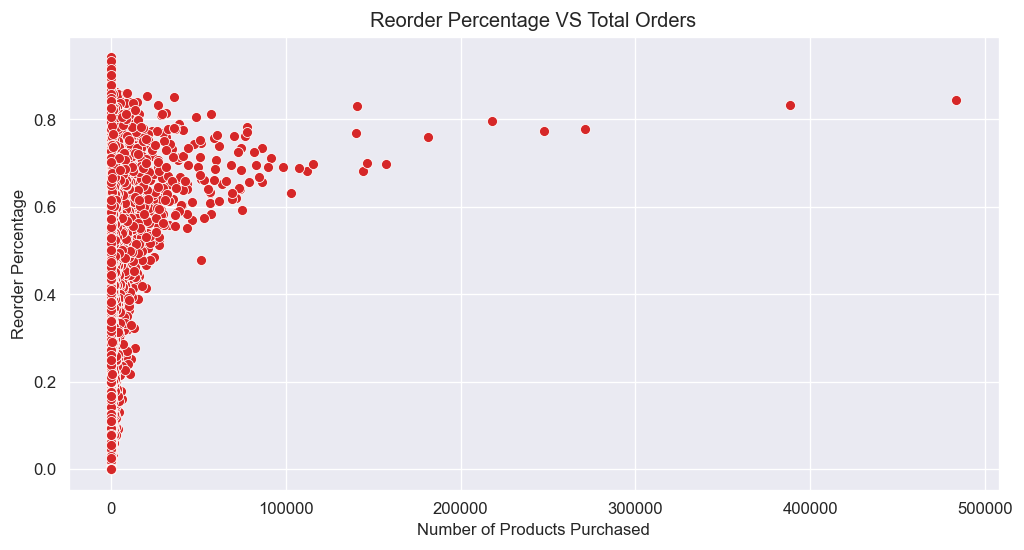

In [104]:
#Reorder Percentage VS Total Orders
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

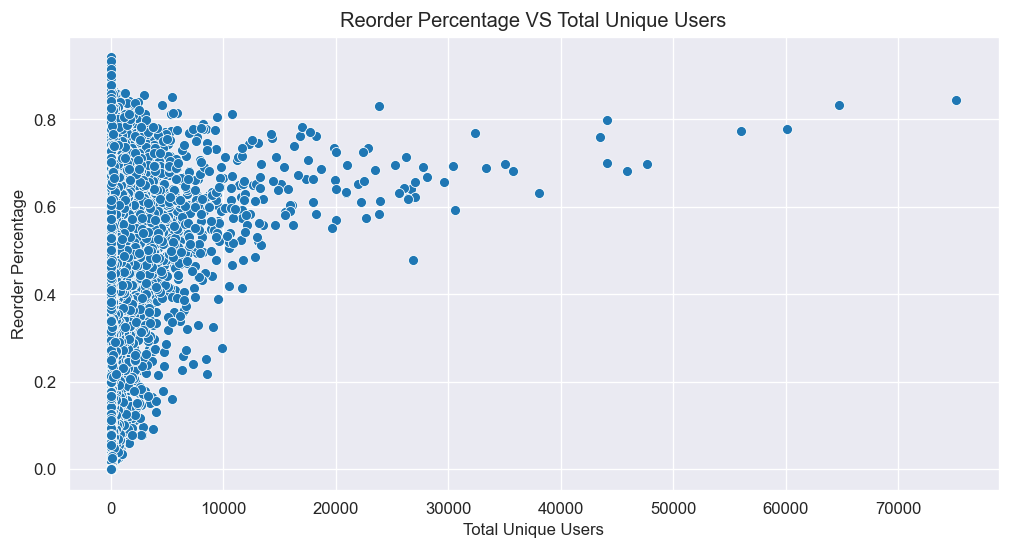

In [105]:
#Reorder Percentage VS Total Unique Users
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

In [106]:
#Organic Vs Inorganic
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,527,788,261.0,0.331218,False
1,#2 Cone White Coffee Filters,10,13,3.0,0.230769,False
2,#2 Mechanical Pencils,8,8,0.0,0.000000,False
3,#4 Natural Brown Coffee Filters,156,246,90.0,0.365854,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,173,92.0,0.531792,False


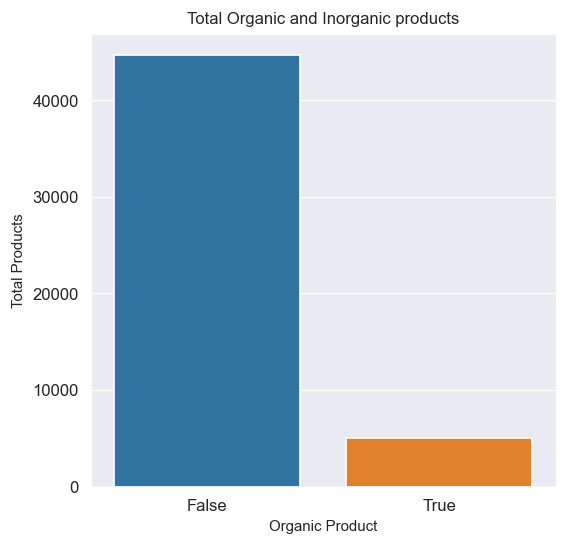

In [107]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

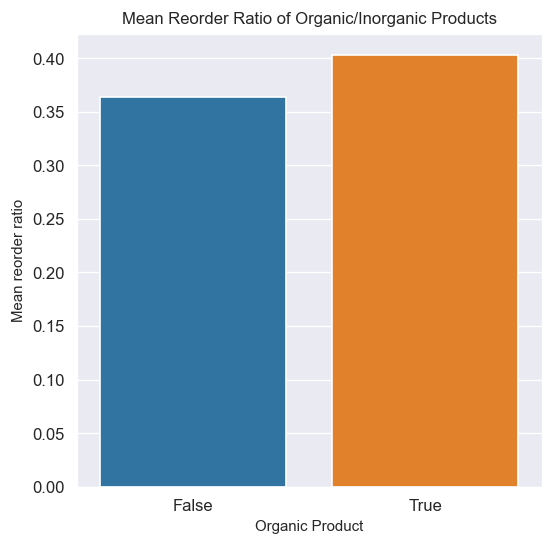

In [108]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

In [109]:
#Add to Cart Order VS Reorder
temp_df = order_products.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.678573
1,2,0.676921
2,3,0.658408
3,4,0.637103
4,5,0.617696


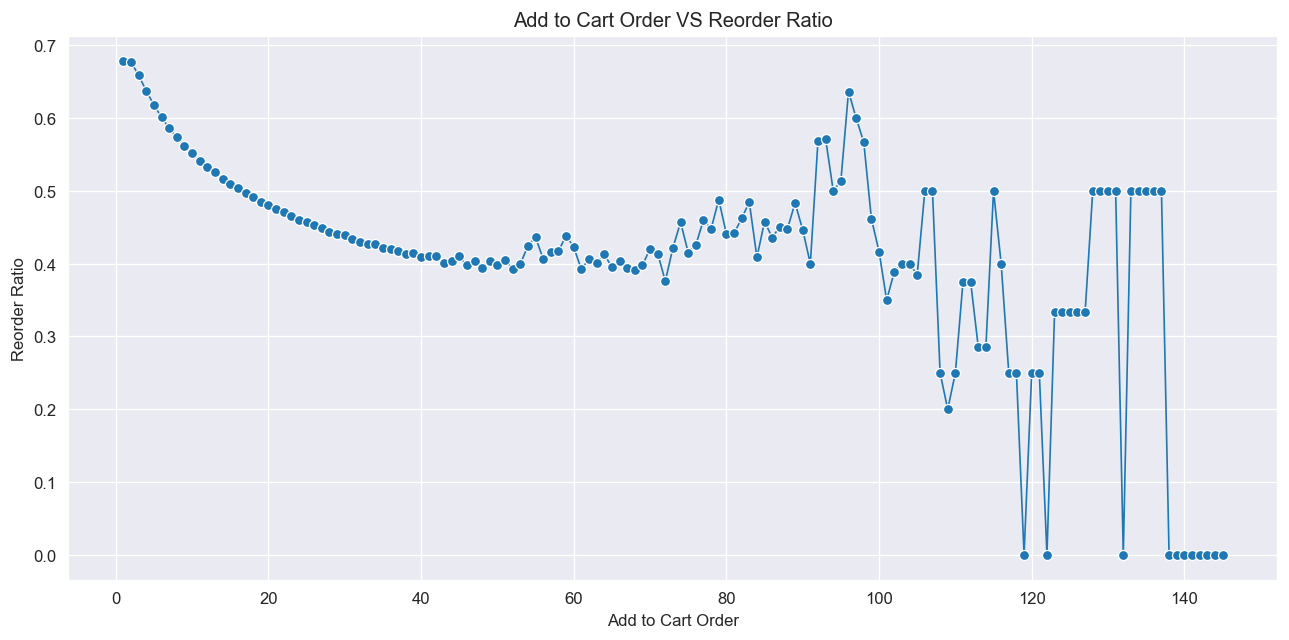

In [110]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

In [111]:
#Most Popular Products on different days
temp_df = order_products.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

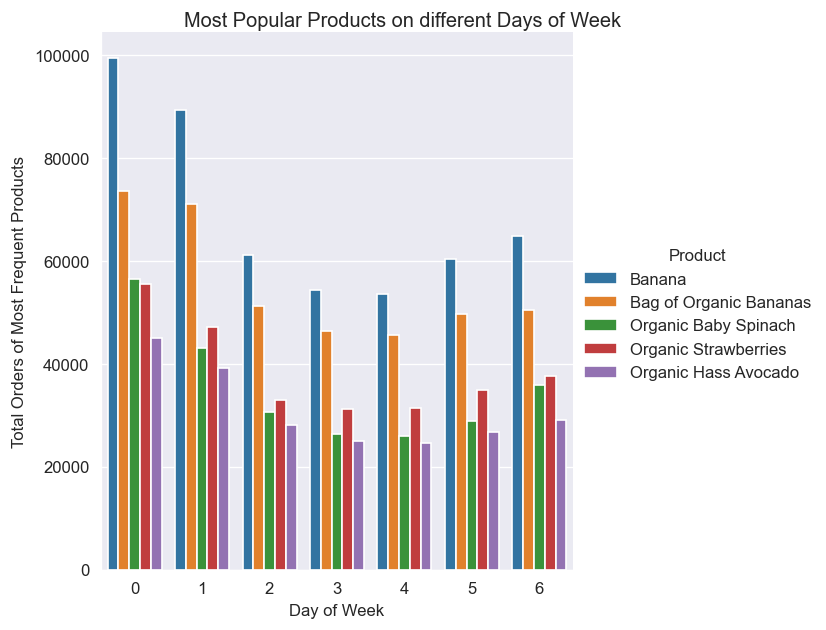

In [112]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")